In [5]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error

from datetime import datetime

In [6]:
df = pd.read_csv('titanicfinal.csv')

In [8]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1307 non-null   int64  
 1   pclass      1307 non-null   float64
 2   survived    1307 non-null   float64
 3   name        1307 non-null   object 
 4   sex         1307 non-null   object 
 5   age         1307 non-null   float64
 6   sibsp       1307 non-null   float64
 7   parch       1307 non-null   float64
 8   ticket      1307 non-null   object 
 9   fare        1307 non-null   float64
 10  embarked    1307 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 112.4+ KB


In [5]:
print(pd.isnull(df).sum())

Unnamed: 0    0
pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64


In [6]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['embarked'].fillna('N',inplace = True)

In [7]:
def encode_features(dataDF):
    features = ['sex','embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

df = encode_features(df)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,2
1,1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,2
2,2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,2
3,3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,2
4,4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,2


In [8]:
def fillna(df):
    df['age'].fillna(df['age'].mean(),inplace = True)
    df['embarked'].fillna('N', inplace = True)
    df['fare'].fillna(0,inplace = True)
    return df

def drop_features(df):
    df.drop(['name', 'ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    features = ['sex','embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df= format_features(df)
    return df

In [9]:
df =pd.read_csv('titanicfinal.csv')
y_df=df['survived']
X_df=df.drop('survived',axis=1)

X_df = transform_features(X_df)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X_df, y_df, \
                                                  test_size=0.2, random_state=11)

# RandomForest

In [11]:
rf_clf = RandomForestClassifier(random_state=11)

In [21]:
%%time

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print(pd.DataFrame(confusion_matrix(y_test,rf_pred)))

     0   1
0  140  17
1   33  72
Wall time: 175 ms


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

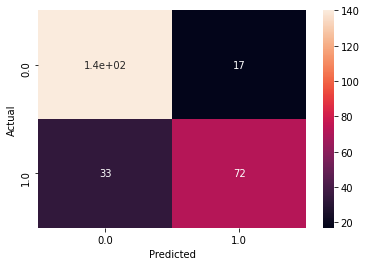

In [13]:
clf_rf_matrix = pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(clf_rf_matrix, annot=True)

In [14]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, rf_pred)))

print('Precision Score is {:.5}'.format(precision_score(y_test, rf_pred)))

print('Recall Score is {:.5}'.format(recall_score(y_test, rf_pred)))

print('MSE is {:.5}'.format(mean_squared_error(y_test, rf_pred)))

Accuracy Score is 0.80916
Precision Score is 0.80899
Recall Score is 0.68571
MSE is 0.19084


# GradientBoosting

In [25]:
%%time

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)

print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

     0   1
0  148   9
1   39  66
Wall time: 135 ms


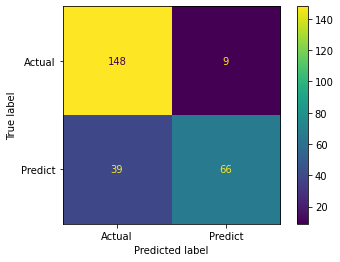

In [16]:
plot_confusion_matrix(gbk,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Actual", "Predict"])

In [27]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred)))

print('Precision Score is {:.5}'.format(precision_score(y_test, y_pred)))

print('Recall Score is {:.5}'.format(recall_score(y_test, y_pred)))

print('MSE is {:.5}'.format(mean_squared_error(y_test, y_pred)))

Accuracy Score is 0.81679
Precision Score is 0.88
Recall Score is 0.62857
MSE is 0.18321
